In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
#read treatment1 data into dataframe
T1_no_diabetes =pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='No_diabetes')
T1_pre_diabetes = pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='Pre-diabetes')
T1_diabetes = pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='Diabetes')

In [49]:
#make one datafrafme of all three dataframes
T1_no_diabetes['no_diabetes'] = 1
T1_no_diabetes['pre_diabetes'] = 0
T1_no_diabetes['diabetes'] = 0

T1_pre_diabetes['no_diabetes'] = 0
T1_pre_diabetes['pre_diabetes'] = 1
T1_pre_diabetes['diabetes'] = 0

T1_diabetes['no_diabetes'] = 0
T1_diabetes['pre_diabetes'] = 0
T1_diabetes['diabetes'] = 1

treatment_1 = pd.concat([T1_no_diabetes, T1_pre_diabetes, T1_diabetes], ignore_index=True)
treatment_1.head()


,No diabetes,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,...,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,Pre-Diabetes,Diabetes
0,1.0,0,1,1020062281,103,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
1,1.0,1,0,1020085314,98,8,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
2,1.0,0,1,1020047252,98,4,22.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
3,1.0,0,1,1019318116,97,12,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
4,1.0,0,1,1019349783,97,7,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN


In [50]:
# Drop the extra columns
treatment_1 = treatment_1.drop(columns=['No diabetes', 'Pre-Diabetes', 'Diabetes'])

# Fill NaN values with 0 in specified columns
columns_to_fill = ['Length of Stay','Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
treatment_1[columns_to_fill] = treatment_1[columns_to_fill].fillna(0)

# Display the first few rows of the cleaned dataframe
treatment_1.head()


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,0,1,1020062281,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,1,0,1020085314,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,0,1,1020047252,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,0,1,1019318116,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,0,1,1019349783,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


In [51]:
#treatment_1.to_excel('treatment1.xlsx', index=False)

In [52]:
# Checking for NaN values in each column
nan_values = treatment_1.isna().sum()
nan_values

Gender (M)          0
Gender (F)          0
Case Number         0
Age                 0
Length of Stay      0
BMI               621
Fall                0
U69.*               0
T81.*               0
T84.*               0
N17.*               0
I21.*               0
R96.*               0
TOD                 0
INTENSIV            0
no_diabetes         0
pre_diabetes        0
diabetes            0
dtype: int64

In [53]:
#adding age bins to check for age distribution
# Define age groups
age_groups = ['18-40', '40-60', '60+']



# Define bins and labels for the age groups
bins = [18, 40, 60, treatment_1['Age'].max()]
labels = age_groups

# Create a new column 'age_group' based on the age groups defined
treatment_1['age_group'] = pd.cut(treatment_1['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
treatment_1.head()


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,age_group
0,0,1,1020062281,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
1,1,0,1020085314,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
2,0,1,1020047252,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
3,0,1,1019318116,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,60+
4,0,1,1019349783,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,60+


In [54]:
# Finding the rows where the 'age_group' column has NaN values
nan_age_group_rows = treatment_1[treatment_1['age_group'].isna()]
nan_age_group_rows


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,age_group


In [55]:
# Calculate descriptive statistics for each group
desc_stats = treatment_1.groupby(['no_diabetes', 'pre_diabetes', 'diabetes']).agg(
    mean_age=('Age', 'mean'),
    median_age=('Age', 'median'),
    std_age=('Age', 'std'),
    mean_length_of_stay=('Length of Stay', 'mean'),
    median_length_of_stay=('Length of Stay', 'median'),
    std_length_of_stay=('Length of Stay', 'std'),
    mean_BMI=('BMI', 'mean'),
    median_BMI=('BMI', 'median'),
    std_BMI=('BMI', 'std'),
)

# Display the descriptive statistics
desc_stats.reset_index()


,no_diabetes,pre_diabetes,diabetes,mean_age,median_age,std_age,mean_length_of_stay,median_length_of_stay,std_length_of_stay,mean_BMI,median_BMI,std_BMI
0,0,0,1,70.229032,71.0,12.745040,12.196774,8.0,11.954471,30.380513,28.6,8.405437
1,0,1,0,69.514493,70.0,12.382726,11.731884,8.0,9.313313,29.664151,27.7,9.793819
2,1,0,0,56.722551,58.0,20.040927,10.073636,7.0,9.533382,26.728909,25.4,7.009980


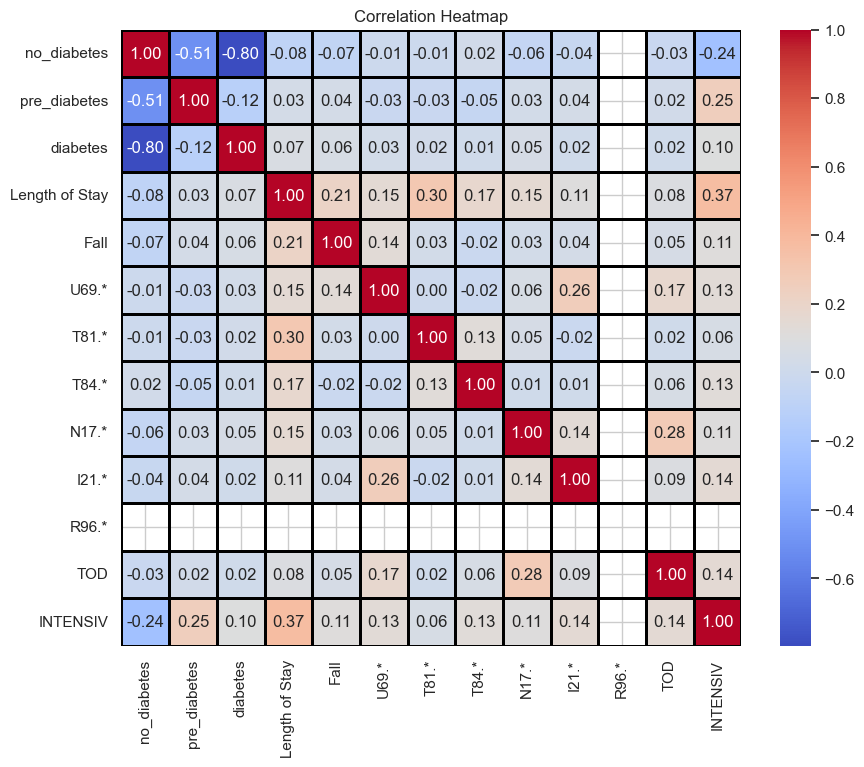

In [56]:
# Heatmap of conditions with complications
#Select the columns to be used for the heatmap
cols = ['no_diabetes', 'pre_diabetes', 'diabetes', 'Length of Stay', 'Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
correlation_matrix = treatment_1[cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')

# Set title and show plot
plt.title('Correlation Heatmap')
plt.show()

In [57]:
# Perform one-way ANOVA for any variable of interest
def one_way_anova(df, variable_of_interest):
    f_statistic, p_value = f_oneway(
        df[variable_of_interest][df['no_diabetes'] == 1],
        df[variable_of_interest][df['pre_diabetes'] == 1],
        df[variable_of_interest][df['diabetes'] == 1]
    )
    return f_statistic, p_value

In [58]:
# Perform t-test for any variable of interest run for both pre_diabtes and diabetes vs no_diabetes
def t_test(df, variable_of_interest):
    t_statistic1, p_value1 = ttest_ind(
        df[variable_of_interest][df['pre_diabetes'] == 1],
        df[variable_of_interest][df['no_diabetes'] == 1]
    )
    t_statistic2, p_value2 = ttest_ind(
        df[variable_of_interest][df['diabetes'] == 1],
        df[variable_of_interest][df['no_diabetes'] == 1]
    )
#compile in dataframe
    t_test_results = pd.DataFrame({
        't_statistic': [t_statistic1, t_statistic2],
        'p_value': [p_value1, p_value2]
    }, index=['pre_diabetes vs no_diabetes', 'diabetes vs no_diabetes'])

    #print results
    return t_test_results

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_hsd(df, variable_of_interest):
    # Create a new column 'group' to indicate the group of each row (no_diabetes, pre_diabetes, diabetes)
    df['group'] = df.apply(lambda row: 'no_diabetes' if row['no_diabetes'] == 1 else ('pre_diabetes' if row['pre_diabetes'] == 1 else 'diabetes'), axis=1)
    tukey_results = pairwise_tukeyhsd(df[variable_of_interest], df['group'])
    
    # Print summary of results
    print(tukey_results.summary())

    return tukey_results

In [60]:
# Visualize the tukey results for any variable of interest using a foreset plot
def visualize_tukey_results(tukey_results, df, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    tukey_results.plot_simultaneous() # Plot group confidence intervals
    
    # Calculating the mean
    mean = df[variable_of_interest].mean() # Calculate the mean of the data
    plt.vlines(x=mean, ymin=-0.5, ymax=2.5, color="red") # Add a vertical line at the mean of the data

    # Add a title and axis labels
    xlabel = "Mean " + variable_of_interest # Define x-axis label
    ylabel = "Group" # Define y-axis label
    plt.xlabel(xlabel) # Set x-axis label
    plt.ylabel(ylabel) # Set y-axis label

    plt.show()

In [61]:
#Perform Covariance analysis for any variable of interest
from statsmodels.formula.api import ols

def covariance_analysis(df, variable_of_interest):
    # Adding age as a static control variable
    cov_model = ols(f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + C(diabetes) + Age", data=df).fit()
    cov_anova_table = sm.stats.anova_lm(cov_model, typ=2)
    return cov_anova_table 

In [62]:
from statsmodels.formula.api import ols

#perform residual adjustment for any variable of interest

def residual_adjustment(df, variable_of_interest):
    # Adding age as a static control variable
    formula = f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + C(diabetes) + Age" # Using Q() to quote variable names with spaces
    res_model = ols(formula, data=df).fit()
    df['residuals'] = res_model.resid
    return df


In [63]:
from scipy.stats import chi2_contingency
# Perform chi-square test for any variable of interest 
def chi_square_test(df, variable_of_interest):
    # Create a contingency table for each condition 
    contingency_table_no_diabetes = pd.crosstab(df[variable_of_interest], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df[variable_of_interest], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df[variable_of_interest], df['diabetes'])

    # Perform the chi-square test for each condition
    chi2_no_diabetes, p_value_no_diabetes, dof_no_diabetes, _ = chi2_contingency(contingency_table_no_diabetes)
    chi2_pre_diabetes, p_value_pre_diabetes, dof_pre_diabetes, _ = chi2_contingency(contingency_table_pre_diabetes)
    chi2_diabetes, p_value_diabetes, dof_diabetes, _ = chi2_contingency(contingency_table_diabetes)

    #compile the results into a dataframe
    chi_square_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'chi2': [chi2_no_diabetes, chi2_pre_diabetes, chi2_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes],
        'dof': [dof_no_diabetes, dof_pre_diabetes, dof_diabetes]
    })  

    # Print summary of results
    print(chi_square_results)
    
    return chi_square_results


In [64]:
#visualize the results

def visualize_chi_square_results(df, variable, chi2_results):
    sns.set(style='whitegrid')
    
    # Create a new column representing the conditions
    condition_labels = ['No Diabetes']*df['no_diabetes'].sum() + \
                       ['Pre-Diabetes']*df['pre_diabetes'].sum() + \
                       ['Diabetes']*df['diabetes'].sum()
    
    # Adding the new column to the dataframe
    df['condition'] = condition_labels
    
    # Creating a bar plot to visualize the proportion of individuals with the complication in each group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='condition', y=variable, data=df, errorbar=None)
    
    # Adding labels and title to the plot
    plt.ylabel(f'Proportion of Individuals with "{variable}" Complication')
    plt.xlabel('Condition')
    plt.title(f'Proportion of Individuals Experiencing "{variable}" Complication by Condition')
    
    # Adding p-value asterisks
    # The y-coordinate for the p-value annotations is based on the maximum value in the variable column
    y_max = df.groupby('condition')[variable].mean().max() - 0.01
    
    # Display the plot
    plt.show()

In [65]:
# Perform relative risk analysis for any variable of interest
def relative_risk_analysis(df, variable_of_interest):
    # Create a contingency table for each condition 
    contingency_table_no_diabetes = pd.crosstab(df[variable_of_interest], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df[variable_of_interest], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df[variable_of_interest], df['diabetes'])

    # Calculate the relative risk for each condition
    relative_risk_no_diabetes = contingency_table_no_diabetes.iloc[1, 1] / contingency_table_no_diabetes.iloc[0, 1]
    relative_risk_pre_diabetes = contingency_table_pre_diabetes.iloc[1, 1] / contingency_table_pre_diabetes.iloc[0, 1]
    relative_risk_diabetes = contingency_table_diabetes.iloc[1, 1] / contingency_table_diabetes.iloc[0, 1]

    # Calculate the 95% confidence interval for each condition
    ci_no_diabetes = np.exp(np.log(relative_risk_no_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1]))
    ci_pre_diabetes = np.exp(np.log(relative_risk_pre_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1]))
    ci_diabetes = np.exp(np.log(relative_risk_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1]))


    # Calculate the p-value for each condition
    p_value_no_diabetes = norm.cdf(-np.abs(np.log(relative_risk_no_diabetes) / np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1])))
    p_value_pre_diabetes = norm.cdf(-np.abs(np.log(relative_risk_pre_diabetes) / np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1])))
    p_value_diabetes = norm.cdf(-np.abs(np.log(relative_risk_diabetes) / np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1])))

    # Compile the results into a dataframe
    relative_risk_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'relative_risk': [relative_risk_no_diabetes, relative_risk_pre_diabetes, relative_risk_diabetes],
        'ci': [ci_no_diabetes, ci_pre_diabetes, ci_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes]
    })

    # Print summary of results
    print(relative_risk_results)
    
    return relative_risk_results


In [66]:
# Visualize the relative risk results for any variable of interest using a forest plot
def visualize_relative_risk_results(relative_risk_results, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    plt.scatter(relative_risk_results['relative_risk'], relative_risk_results['condition']) # Plot the relative risks
    plt.errorbar(relative_risk_results['relative_risk'], relative_risk_results['condition'], xerr=relative_risk_results['ci'], linestyle="None") # Plot the confidence intervals
    plt.axvline(x=1, color='r', linestyle='--') # Add a vertical line at relative risk = 1
    plt.title('Relative risk for ' + variable_of_interest) # Add a title
    plt.ylabel('condition') # Add y-label
    plt.xlabel('relative risk') # Add x-label
    plt.show()

In [67]:
from scipy.stats import fisher_exact
# Perform odds ratio analysis for any variable of interest
def odds_ratio_analysis(df, variable_of_interest):
    
    #find suitable value to divide the variable of interest into two groups
    median = df[variable_of_interest].median()
    
    # Create a new column 'group' to indicate the group of each row (no_diabetes, pre_diabetes, diabetes)
    df['group'] = df.apply(lambda row: 'low' if row[variable_of_interest] <= median else 'high', axis=1)

    # Create a contingency table 2 x2 for each condition
    contingency_table_no_diabetes = pd.crosstab(df['group'], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df['group'], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df['group'], df['diabetes'])

    # Calculate the odds ratio for each condition
    odds_ratio_no_diabetes, p_value_no_diabetes = fisher_exact(contingency_table_no_diabetes)
    odds_ratio_pre_diabetes, p_value_pre_diabetes = fisher_exact(contingency_table_pre_diabetes)
    odds_ratio_diabetes, p_value_diabetes = fisher_exact(contingency_table_diabetes)

    #calculate the 95% confidence interval for each condition
    ci_no_diabetes = np.exp(np.log(odds_ratio_no_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1]))
    ci_pre_diabetes = np.exp(np.log(odds_ratio_pre_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1]))
    ci_diabetes = np.exp(np.log(odds_ratio_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1]))


    # Compile the results into a dataframe
    odds_ratio_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'odds_ratio': [odds_ratio_no_diabetes, odds_ratio_pre_diabetes, odds_ratio_diabetes],
        'ci': [ci_no_diabetes, ci_pre_diabetes, ci_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes]
    })
    
    # Print summary of results
    print(odds_ratio_results)
    
    return odds_ratio_results
   


In [68]:
# Visualize the odds ratio results for any variable of interest using a forest plot
def visualize_odds_ratio_results(odds_ratio_results, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    plt.scatter(odds_ratio_results['odds_ratio'], odds_ratio_results['condition']) # Plot the odds ratios
    plt.errorbar(odds_ratio_results['odds_ratio'], odds_ratio_results['condition'], xerr=odds_ratio_results['ci'], linestyle="None") # Plot the confidence intervals
    plt.axvline(x=1, color='r', linestyle='--') # Add a vertical line at odds ratio = 1
    plt.title('Odds ratio for ' + variable_of_interest) # Add a title
    plt.ylabel('condition') # Add y-label
    plt.xlabel('odds ratio') # Add x-label
    plt.show()
    

In [69]:
from scipy.stats import fisher_exact, norm
import numpy as np
import pandas as pd

def relative_risk_by_age(df, variable_of_interest):
    # Create a new column indicating whether the variable of interest is above or below the median
    median = df[variable_of_interest].median()
    df['group'] = df.apply(lambda row: 'low' if row[variable_of_interest] <= median else 'high', axis=1)
    
    # Create a new column representing the conditions
    condition_labels = ['No Diabetes']*df['no_diabetes'].sum() + \
                        ['Pre-Diabetes']*df['pre_diabetes'].sum() + \
                        ['Diabetes']*df['diabetes'].sum()
    df['condition'] = condition_labels

    # Get unique age groups and conditions
    age_groups = df['age_group'].unique()
    conditions = df['condition'].unique()

    results = []

    # Recreate contingency tables for each age group, calculate relative risk and p-value
    for age_group in age_groups:
        for condition in conditions:
            sub_df = df[df['age_group'] == age_group]
            contingency_table = pd.crosstab(sub_df['group'], sub_df['condition'] == condition)
            
            if contingency_table.shape == (2, 2):
                # Calculate the relative risk for each condition
                relative_risk, p_value = fisher_exact(contingency_table)

                # Calculate the 95% confidence interval for each condition
                confidence_interval = np.exp(np.log(relative_risk) + norm.ppf(0.025) * np.sqrt(1 / contingency_table.iloc[1, 1] + 1 / contingency_table.iloc[0, 1]))

                results.append({
                    'age_group': age_group,
                    'condition': condition,
                    'relative_risk': relative_risk,
                    'p_value': p_value,
                    'confidence_interval': confidence_interval
                })

    
    # Compile the results into a dataframe
    relative_risk_by_age_results = pd.DataFrame(results)
    #sort the dataframe by age group smallest first
    relative_risk_by_age_results = relative_risk_by_age_results.sort_values(by='age_group')
    
    # Print summary of results
    print(relative_risk_by_age_results)
    
    return relative_risk_by_age_results


In [73]:

#testing function of relative_risk_by_age for any variable of interest
relative_risk_by_age(treatment_1, 'Length', 'fall')



TypeError: relative_risk_by_age() takes 2 positional arguments but 3 were given

In [70]:
# Visualize the relative risk by age results for any variable of interest using a forest plot
import matplotlib.pyplot as plt

def visualize_relative_risk_by_age_results(relative_risk_by_age_results, variable_of_interest):
    # Initialize the figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each condition and age group to plot the relative risk and confidence interval
    for i, row in relative_risk_by_age_results.iterrows():
        plt.plot([row['relative_risk'] - row['confidence_interval'], row['relative_risk'] + row['confidence_interval']], [i, i], 'k-', lw=1)
        plt.plot(row['relative_risk'], i, 'ko')
    
    # Adding labels, title, and grid
    labels = relative_risk_by_age_results.apply(lambda row: f"{row['age_group']} {row['condition']}", axis=1)
    plt.yticks(range(len(relative_risk_by_age_results)), labels)
    #plt.xscale('log')  # Set x-axis to log scale for better visualization of data spanning several orders of magnitude
    plt.xlabel('Relative Risk')
    plt.title(f'Relative Risk of High {variable_of_interest} with 95% Confidence Intervals')
    plt.axvline(x=1, color='red', linestyle='--')  # Line of no effect
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.show()
